# Import Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
from matplotlib import rcParams
import seaborn as sns

# visual formatting
sns.set(
    style='white'
)

In [2]:
# expand visual returns
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 10000)

In [3]:
# import master DataFrame mdf
df = pd.read_csv('./data/03_mini_processing.csv', header=0, index_col=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158768 entries, 0 to 158767
Data columns (total 21 columns):
f_dir        158768 non-null object
m_id         158768 non-null object
m_date       158768 non-null object
m_from       158768 non-null object
m_to         155253 non-null object
m_cc         50373 non-null object
m_bcc        47978 non-null object
m_subj       152097 non-null object
mime_vers    158768 non-null float64
cont_type    158768 non-null object
encode       158768 non-null object
x_from       158768 non-null object
x_to         155892 non-null object
x_cc         48339 non-null object
x_bcc        117 non-null object
x_fold       158768 non-null object
x_orig       158768 non-null object
x_fname      156859 non-null object
m_body       158768 non-null object
name         158768 non-null object
gender       158768 non-null object
dtypes: float64(1), object(20)
memory usage: 25.4+ MB


In [5]:
# total email body chars (for process tracking)
start_chars = df.m_body.apply(len).sum()

print('Total Characters Across All Email Bodies in Corpus: {}.'.format(start_chars))

Total Characters Across All Email Bodies in Corpus: 112528801.


In [6]:
df.head(2)

,f_dir,m_id,m_date,m_from,m_to,m_cc,m_bcc,m_subj,mime_vers,cont_type,encode,x_from,x_to,x_cc,x_bcc,x_fold,x_orig,x_fname,m_body,name,gender
0,allen-p/_sent_mail/1,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,NaN,NaN,NaN,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,Tim Belden <Tim Belden/Enron@EnronXGate>,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Here is our forecast,phillip,boy
1,allen-p/_sent_mail/10,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,NaN,NaN,Re:,1.0,text/plain; charset=us-ascii,7bit,Phillip K Allen,John J Lavorato <John J Lavorato/ENRON@enronXg...,NaN,NaN,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Allen-P,pallen (Non-Privileged).pst,Traveling to have a business meeting takes the...,phillip,boy


# Helper Functions

In [7]:
def one_axis_bar(a_df, title_string):
    """Input: 
       - Indexed 1-category dataframe for bar plot
       - Title string
       
       Output: Formatted barh plot.
    
       Pass a DataFrame with axes to return
            a formatted standard barplot.
       
       Plot formatting includes:
       - Adjust colors to gender
       - Add grey gridline
       - Remove legend (color identifies category)
       - Remove left, bottom spine
       - Remove y axis label"""
    
    # sets color to blue, pink
    clrs = ['#347DC1', '#FF85A2']

    # plot
    a_df.plot(kind='barh', # selects the barh
        title=title_string, # sets the title to the input string
        color=clrs, # passes the colors above to plot
        legend=False, # removes legend
        grid='g', # set gridlines to grey
        ).invert_yaxis() # inverts plot on y axis 

    sns.despine(
        #left=True, 
        right=True, 
        top=True, 
        #bottom=True
    )
    
    # remove y axis label
    plt.xlabel('')
    plt.ylabel('')  

In [8]:
def one_axis_barh(a_df, title_string):
    """Input: 
       - Indexed 2-category dataframe for comparison barh plot
       - Title string
       
       Output: Formatted barh plot
    
       Pass a DataFrame with two gender axes to return
            a formatted horizontal barplot with two comparison
            horizontal bars on each major index entry.
       
       Plot formatting includes:
       - Adjust colors to pink, blue
       - Flip y-axis so barh plot is correct orientation
       - Remove legend (color identifies category)"""
    
    # sets color to blue, pink
    clr = ['#36454f']

    # plot
    a_df.plot(kind='barh', # selects the barh
        title=title_string, # sets the title to the input string
        color=clr, # passes the colors above to plot
        legend=False, # removes legend
        grid='g', # set gridlines to grey
        ).invert_yaxis() # inverts plot on y axis 

    sns.despine(
        #left=True, 
        right=True, 
        top=True, 
        #bottom=True
    )
    
    # remove y axis label
    plt.xlabel('')
    plt.ylabel('')    

In [9]:
def two_axes_barh(a_df, title_string):
    """Input: 
       - Indexed 2-category dataframe for comparison barh plot
       - Title string
       
       Output: Formatted barh plot
    
       Pass a DataFrame with two gender axes to return
            a formatted horizontal barplot with two comparison
            horizontal bars on each major index entry.
       
       Plot formatting includes:
       - Adjust colors to pink, blue
       - Flip y-axis so barh plot is correct orientation
       - Remove legend (color identifies category)"""
    
    # sets color to blue, pink
    clrs = ['#347DC1', '#FF85A2']

    # plot
    a_df.plot(kind='barh', # selects the barh
        title=title_string, # sets the title to the input string
        color=clrs, # passes the colors above to plot
        legend=False,  # removes legend
        grid='g', # set gridlines to grey
        ).invert_yaxis() # inverts plot on y axis 

    sns.despine(
        #left=True, 
        right=True, 
        top=True, 
        #bottom=True
    )
    
    # remove y axis label
    plt.xlabel('')
    plt.ylabel('')    

# Draw Simple Visualizations

## emails sent by gender

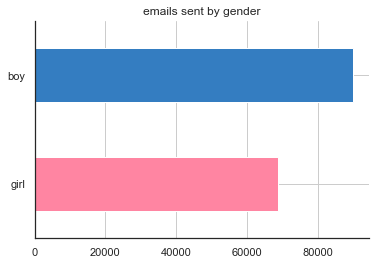

In [10]:
p = df.copy()
p = p.groupby(['gender']).size() # return size agg for gender

one_axis_bar(p, 'emails sent by gender')

## number of senders by gender

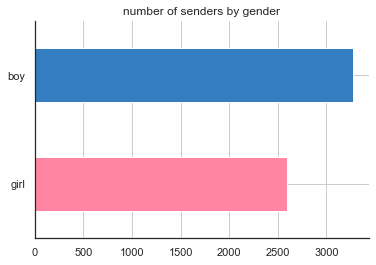

In [11]:
p = df.copy()
p = p.drop_duplicates('m_from').groupby(['gender']).size()

one_axis_bar(p, 'number of senders by gender')

## Create a DatetimeIndex

In [12]:
#df.groupby(['m_date']).size().plot(kind='bar', title='emails sent timeseries')
df.loc[:, 'm_date'].head()

0    Mon, 14 May 2001 16:39:00 -0700 (PDT)
1     Fri, 4 May 2001 13:51:00 -0700 (PDT)
2    Wed, 18 Oct 2000 03:00:00 -0700 (PDT)
3    Mon, 23 Oct 2000 06:13:00 -0700 (PDT)
4    Thu, 31 Aug 2000 05:07:00 -0700 (PDT)
Name: m_date, dtype: object

In [13]:
%%time

timf = df.copy() # copy initial df
timf = timf.reset_index() # reset index to retain starting index

timf['m_date'] = pd.to_datetime(timf['m_date'], utc=True) # make series a datetime object, normalize it to utc
timf['m_date'] = pd.to_datetime(timf['m_date']).dt.tz_convert('US/Pacific') # convert timezone back to eastern time using .dt to identify a DatetimeIndex object
timf = timf.set_index(pd.DatetimeIndex(timf['m_date'])) # sets index to m_date as a DatetimeIndex

daylist = ['Sunday', 'Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday'] # day list for Categorical dtype ordering 

timf['day_names'] = timf.index.day_name() # sets DatetimeIndex to weekday names; sets the series to categorically reference the list for sorting
timf['day_names'] = pd.Categorical(timf['day_names'], daylist, ordered=True) 

Wall time: 30.7 s


## emails sent each weekday

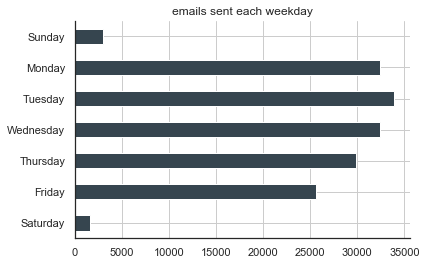

In [14]:
p = timf.copy()
p = pd.DataFrame(p.groupby(['day_names']).size())[0].sort_index()  # groupby size, reindex

one_axis_barh(p, 'emails sent each weekday') # send to plotter

## emails sent each weekday by gender

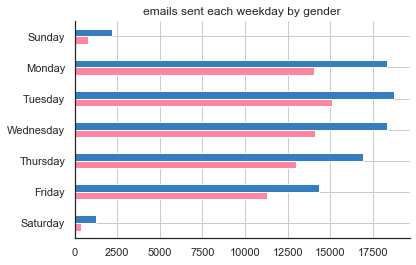

In [15]:
p = timf.copy()
p = pd.DataFrame(p.groupby(['day_names', 'gender']).size()).unstack().reindex(labels=daylist)[0]

two_axes_barh(p, 'emails sent each weekday by gender')

## emails sent each weekday normalized by gender

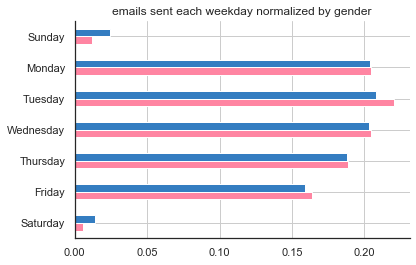

In [16]:
p = timf.copy() # copy df
gender_totals = p[['gender']] # isolate gender for aggregate
gender_totals = gender_totals.groupby(['gender']).size().reset_index()

p = p.groupby(['day_names', 'gender']).size().reset_index() 
p = p.merge(gender_totals, how='left', on='gender')
p['normalized_gender'] = p['0_x'] / p['0_y'] # create new column of normalized gender counts
p = p.loc[:,['day_names', 'gender', 'normalized_gender']].set_index(['day_names', 'gender']).unstack('gender').normalized_gender # setup dataset 

two_axes_barh(p, 'emails sent each weekday normalized by gender')

In [17]:
print(p) # emails sent each weekday normalized by gender table

gender          boy      girl
day_names                    
Sunday     0.024545  0.011610
Monday     0.203583  0.204609
Tuesday    0.207881  0.220163
Wednesday  0.203405  0.204886
Thursday   0.187734  0.188809
Friday     0.158979  0.164162
Saturday   0.013872  0.005762


## Plot Sent Emails By Month

C:\Users\james\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:2180: FutureWarning: Addition/subtraction of integers and integer-arrays to Timestamp is deprecated, will be removed in a future version.  Instead of adding/subtracting `n`, use `n * self.freq`
  dx = [convert(x0 + ddx) - x for ddx in dx]


Text(0.5, 1.0, 'emails sent each month')

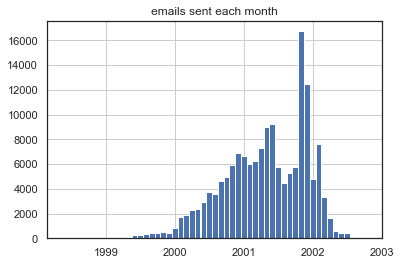

In [18]:
# time series plot SENT EMAILS BY MONTH

# create a time series of the email counts per month to plot
p = timf.loc['1998':].resample('M').count().m_from.copy()

# set the Locator, Formatter objects
years = mdates.YearLocator() # every year
months = mdates.MonthLocator() # every month
years_fmt = mdates.DateFormatter('%Y') # format year

# create plot
fig, ax = plt.subplots() # create figure, 1 axes
ax.bar(p.index, p.values, width=1) # create barplot with c data

# format the ticks
ax.xaxis.set_major_locator(years) # use Locator object to set major ticks
ax.xaxis.set_minor_locator(months) # use Locator object to set minor ticks
ax.xaxis.set_major_formatter(years_fmt) # format ticklabel strings with Formatter object

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

# axes labels
ax.set_title('emails sent each month') # title

Text(0.5, 1.0, 'emails sent each day')

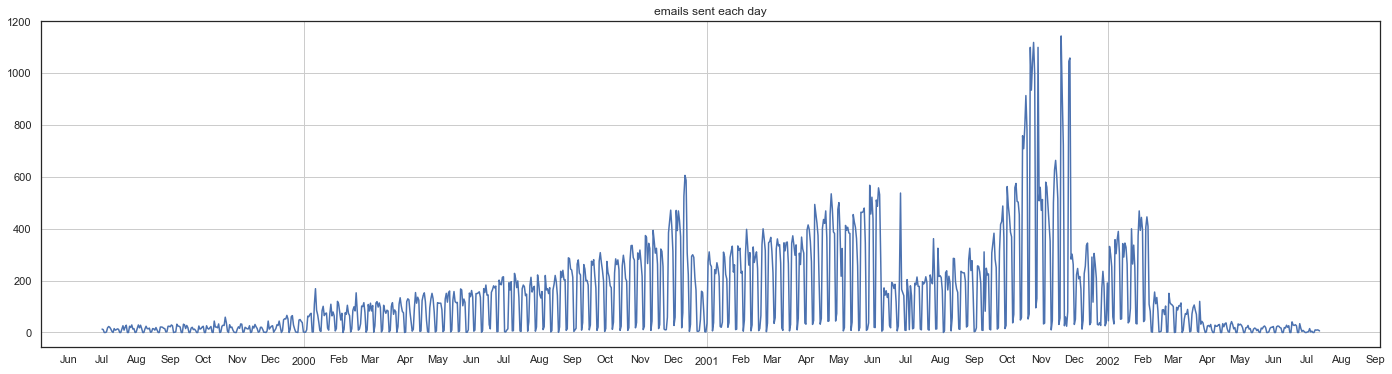

In [19]:
# create a time series of the email counts per month to plot
p = timf.loc['1999-07':'2002-07'].resample('D').count().m_from.copy()

# set the Locator, Formatter objects
years = mdates.YearLocator() # every year
months = mdates.MonthLocator() # every month
years_fmt = mdates.DateFormatter('%Y') # format year
months_fmt = mdates.DateFormatter('%b') # format year

# create plot



fig, ax = plt.subplots(1,1, figsize=(24, 6)) # create figure, 1 axes
#gs = fig.add_gridspec(2, 2)

ax.plot(p.index, p.values) # create barplot with c data

# format the ticks
ax.xaxis.set_major_locator(years) # use Locator object to set major ticks
ax.xaxis.set_minor_locator(months) # use Locator object to set minor ticks
ax.xaxis.set_major_formatter(years_fmt) # format ticklabel strings with Formatter object
ax.xaxis.set_minor_formatter(months_fmt) # 3-letter month name

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

# axes labels
ax.set_title('emails sent each day') # title

Text(0.5, 1.0, 'emails sent each day')

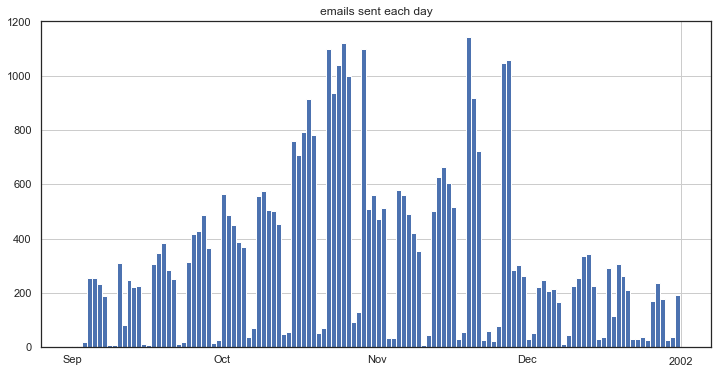

In [23]:
# create a time series of the email counts per month to plot
p = timf.loc['2001-09':'2001-12'].resample('D').count().m_from.copy()

# set the Locator, Formatter objects
years = mdates.YearLocator() # every year
months = mdates.MonthLocator() # every month
years_fmt = mdates.DateFormatter('%Y') # format year
months_fmt = mdates.DateFormatter('%b') # format year

# create plot
fig, ax = plt.subplots(1,1, figsize=(12, 6)) # create figure, 1 axes
#gs = fig.add_gridspec(2, 2)

ax.bar(p.index, p.values, width=1) # create barplot with c data

# format the ticks
ax.xaxis.set_major_locator(years) # use Locator object to set major ticks
ax.xaxis.set_minor_locator(months) # use Locator object to set minor ticks
ax.xaxis.set_major_formatter(years_fmt) # format ticklabel strings with Formatter object
ax.xaxis.set_minor_formatter(months_fmt) # 3-letter month name

# format the coords message box
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.grid(True)

# axes labels
ax.set_title('emails sent each day') # title